In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("glass.csv")
data.head()

,Id number,refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
data.rename(columns={'Id number':'Id_number','refractive index':'refractive_index','Type of glass':'Type_of_glass'},inplace=True)
data.head()

,Id_number,refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
data.shape

(214, 11)

In [5]:
for i in data.columns:
    print(data[i].value_counts())
    print('\n')

1      1
135    1
137    1
138    1
139    1
      ..
75     1
76     1
77     1
78     1
214    1
Name: Id_number, Length: 214, dtype: int64


1.52152    3
1.51590    3
1.51645    3
1.51754    2
1.51841    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: refractive_index, Length: 178, dtype: int64


13.02    5
13.21    5
13.00    5
13.64    4
13.33    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: Sodium, Length: 142, dtype: int64


0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
2.76     1
3.15     1
2.90     1
3.83     1
1.78     1
Name: Magnesium, Length: 94, dtype: int64


1.54    8
1.19    6
1.43    5
1.29    5
1.23    5
       ..
1.08    1
1.64    1
1.61    1
1.07    1
1.94    1
Name: Aluminum, Length: 118, dtype: int64


72.86    4
72.99    4
73.10    4
73.28    4
73.11    4
        ..
73.55    1
72.34    1
72.26    1
73.26    1
73.61    1
Name: Silicon, Length: 133, dtype: int64


0.00    30
0.57

In [6]:
data['Type_of_glass']=data['Type_of_glass'].map({5:0,6:0,7:0,1:1,2:1,3:1,4:1})

In [7]:
data['Type_of_glass'].value_counts()

1    163
0     51
Name: Type_of_glass, dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id_number         214 non-null    int64  
 1   refractive_index  214 non-null    float64
 2   Sodium            214 non-null    float64
 3   Magnesium         214 non-null    float64
 4   Aluminum          214 non-null    float64
 5   Silicon           214 non-null    float64
 6   Potassium         214 non-null    float64
 7   Calcium           214 non-null    float64
 8   Barium            214 non-null    float64
 9   Iron              214 non-null    float64
 10  Type_of_glass     214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [9]:
data.isna().sum()

Id_number           0
refractive_index    0
Sodium              0
Magnesium           0
Aluminum            0
Silicon             0
Potassium           0
Calcium             0
Barium              0
Iron                0
Type_of_glass       0
dtype: int64

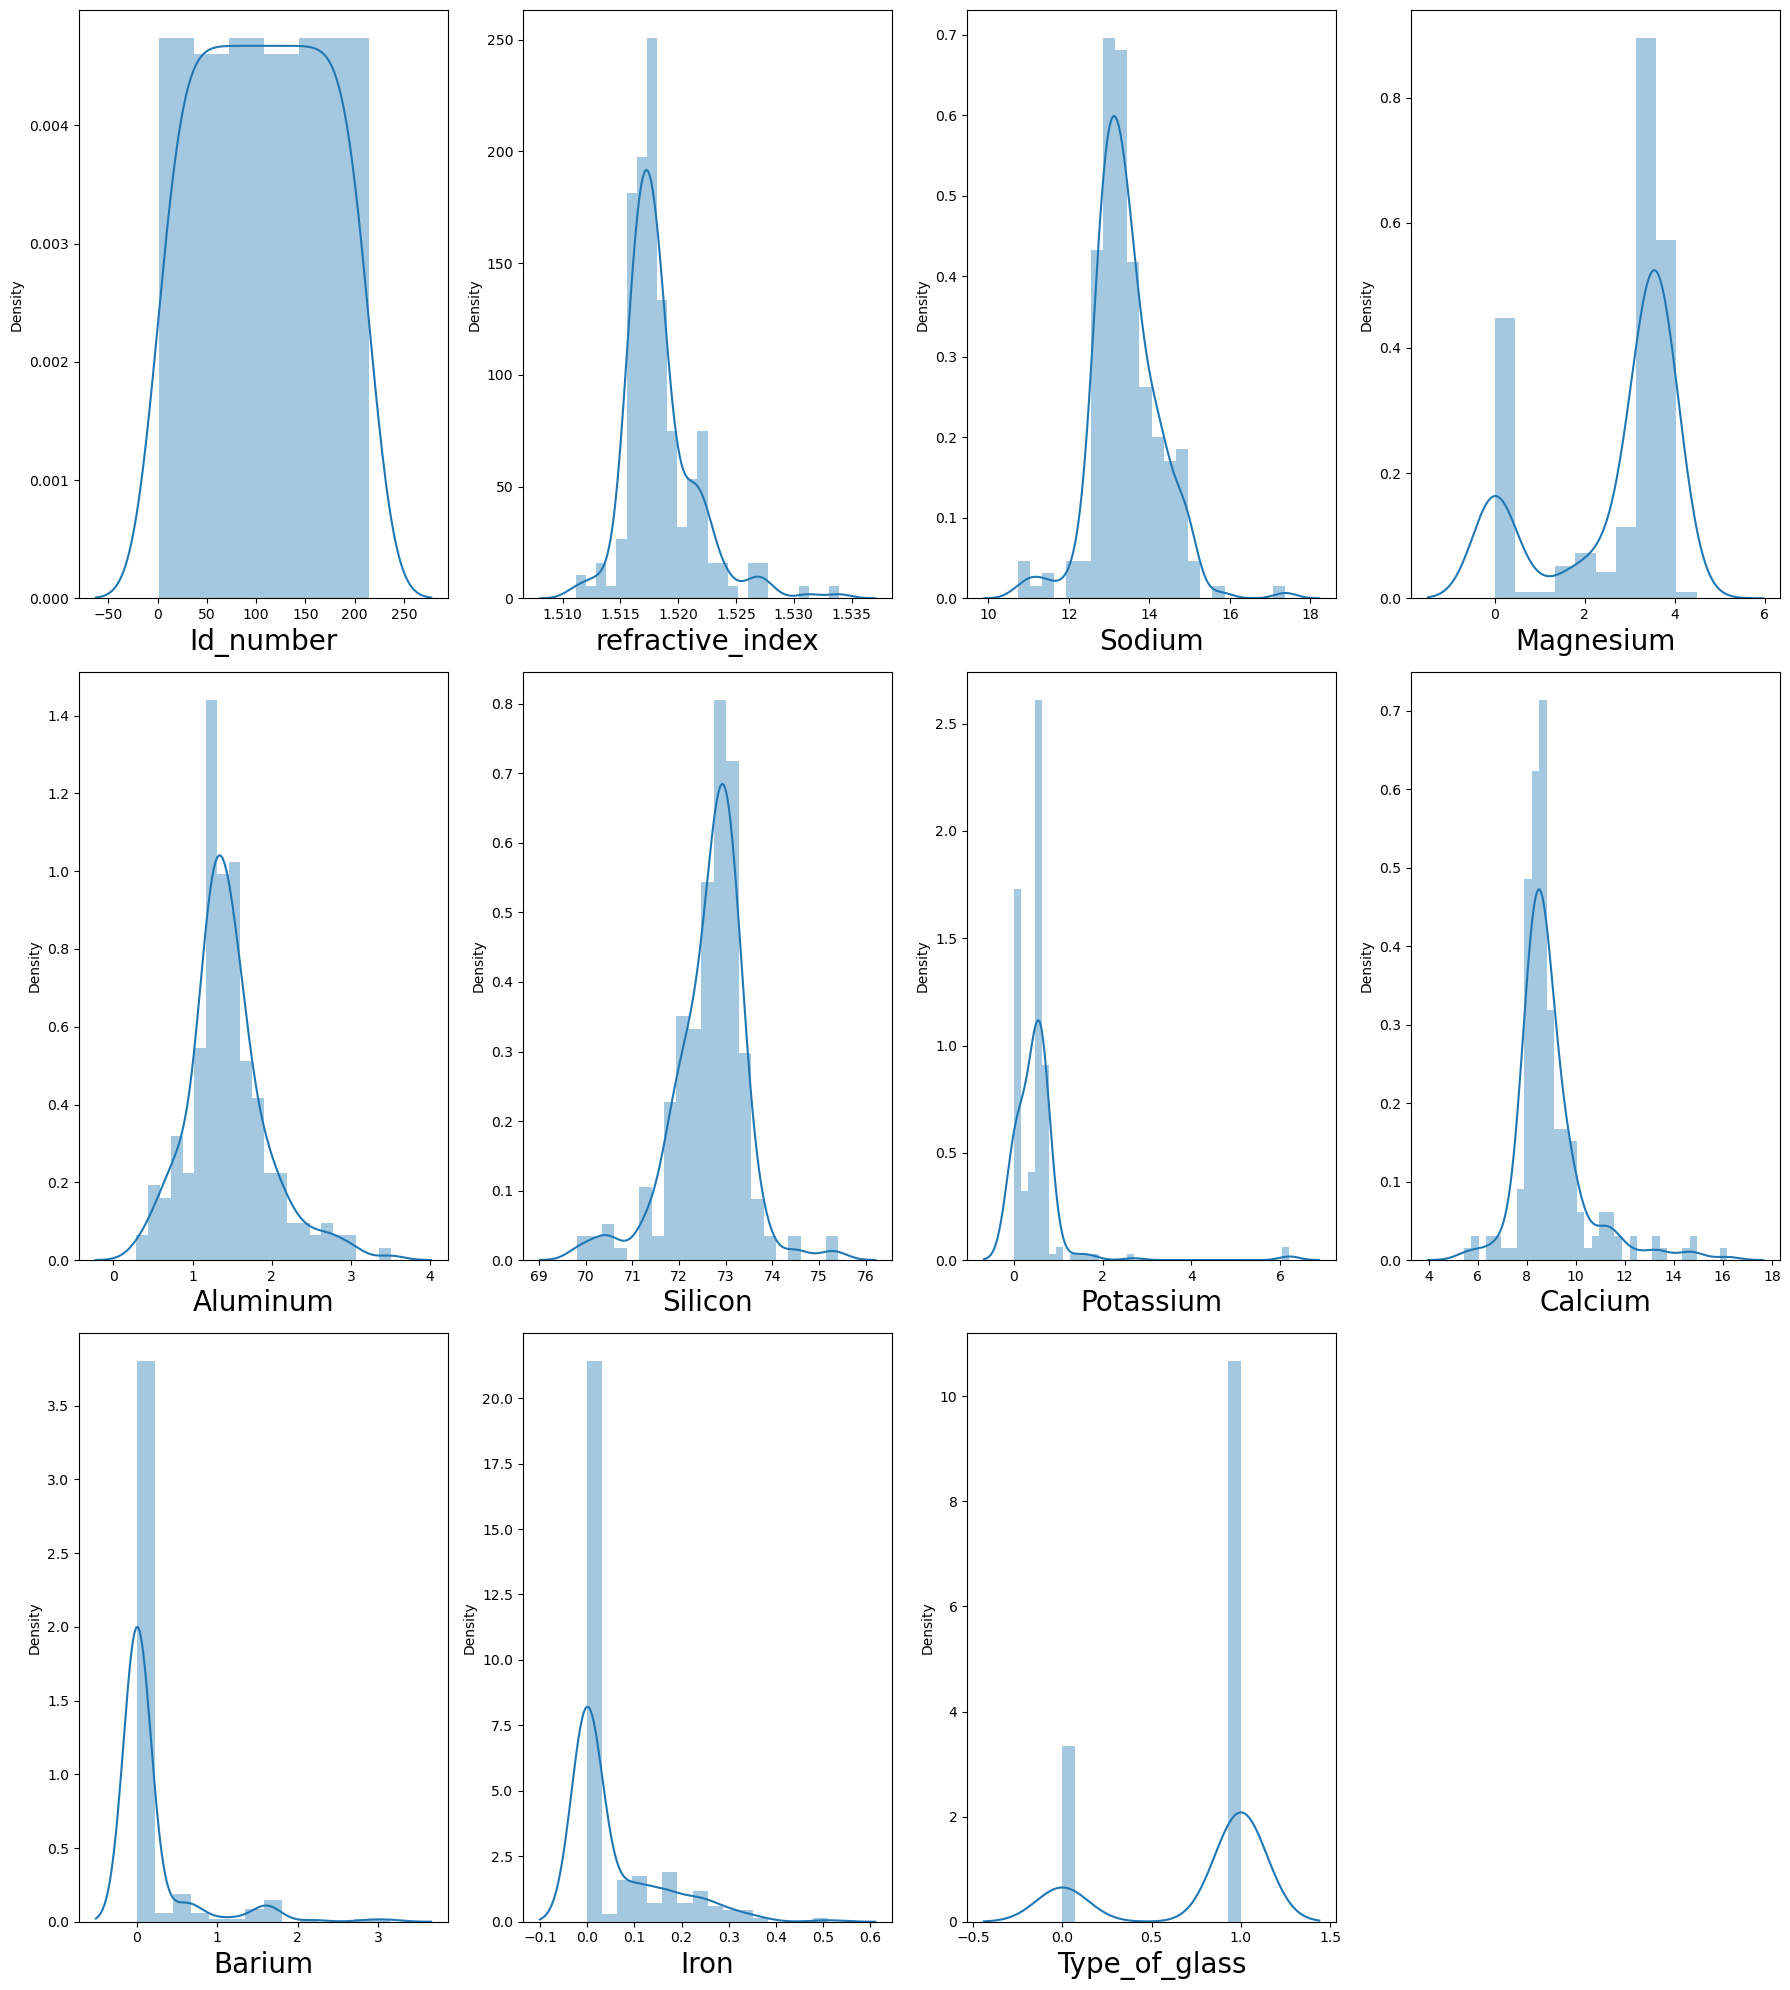

In [10]:
plt.figure(figsize=(18,20),facecolor="w")
plot=1
for i in data:
    if plot<=11:
        ax=plt.subplot(3,4,plot)
        sns.distplot(data[i])
        plt.xlabel(i,fontsize=20)
    plot+=1
plt.tight_layout()

In [11]:
data.skew()

Id_number           0.000000
refractive_index    1.625431
Sodium              0.454181
Magnesium          -1.152559
Aluminum            0.907290
Silicon            -0.730447
Potassium           6.551648
Calcium             2.047054
Barium              3.416425
Iron                1.754327
Type_of_glass      -1.237086
dtype: float64

In [12]:
data.drop(columns='Id_number',inplace=True)

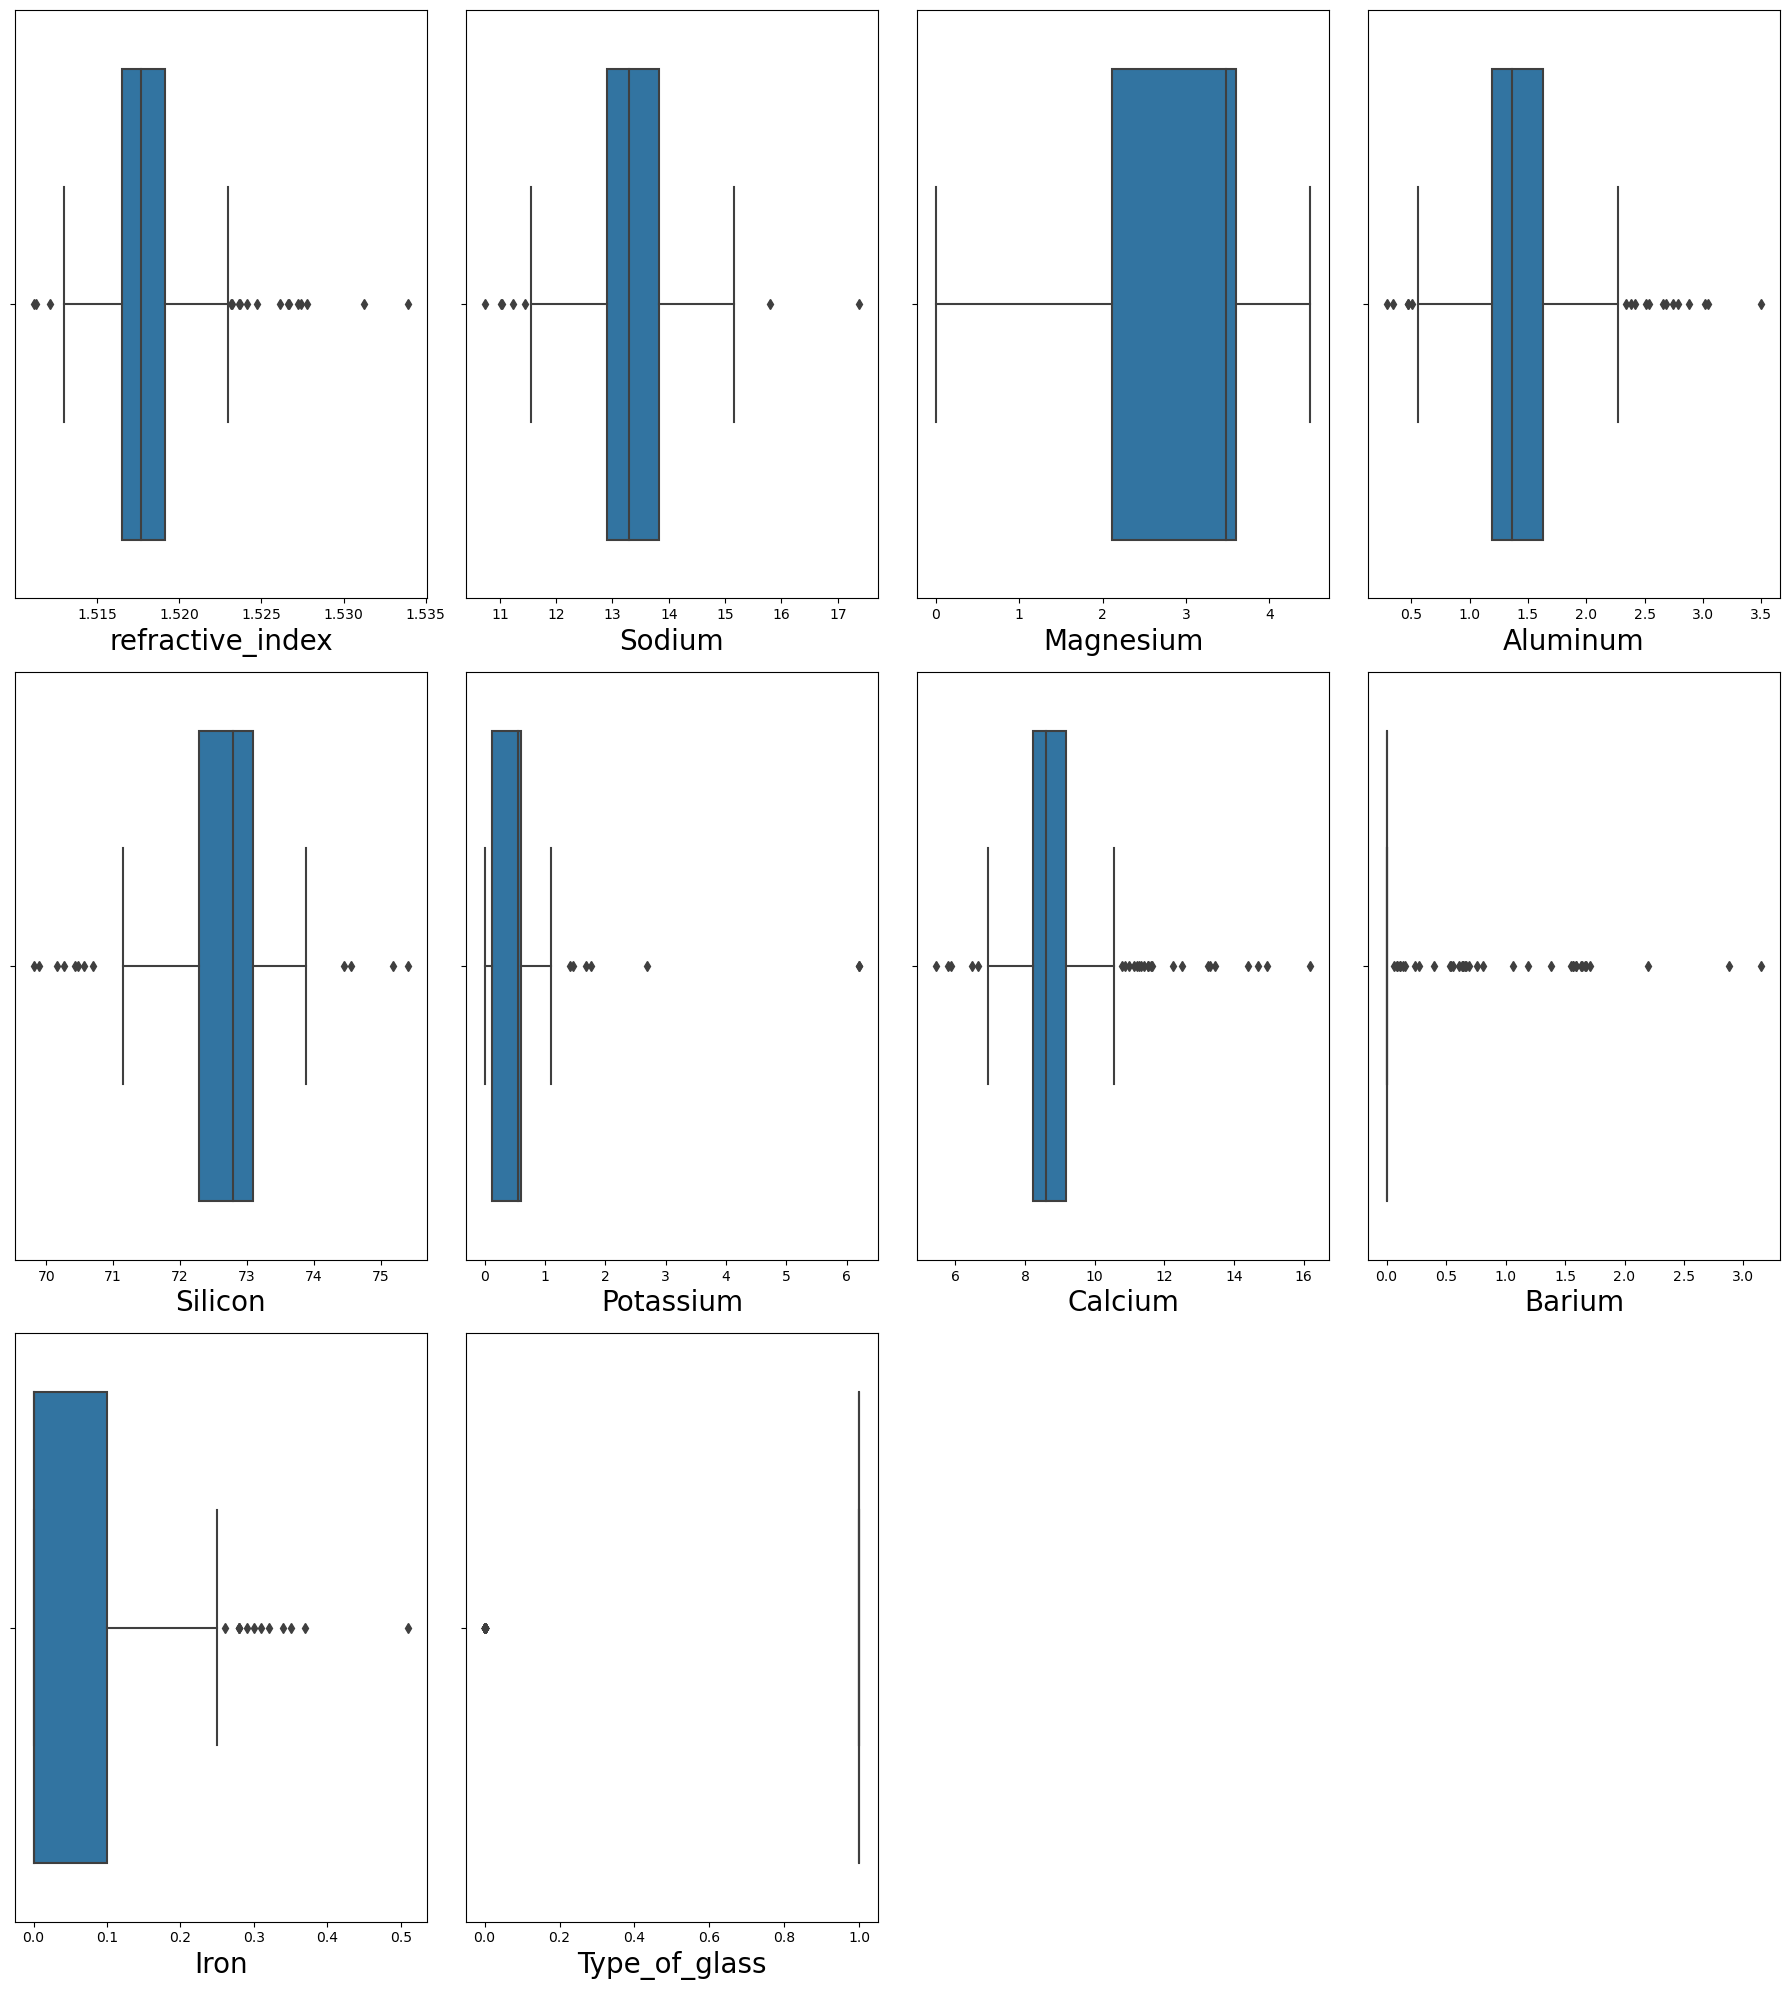

In [13]:
plt.figure(figsize=(18,20),facecolor="w")
plot=1
for i in data:
    if plot<=11:
        ax=plt.subplot(3,4,plot)
        sns.boxplot(data[i])
        plt.xlabel(i,fontsize=20)
    plot+=1
plt.tight_layout()

In [14]:
q1=data.quantile(.25)
q2=data.quantile(.50)
q3=data.quantile(.75)

In [15]:
iqr=q3-q1
iqr

refractive_index    0.002635
Sodium              0.917500
Magnesium           1.485000
Aluminum            0.440000
Silicon             0.807500
Potassium           0.487500
Calcium             0.932500
Barium              0.000000
Iron                0.100000
Type_of_glass       0.000000
dtype: float64

In [16]:
data.columns

Index(['refractive_index', 'Sodium', 'Magnesium', 'Aluminum', 'Silicon',
       'Potassium', 'Calcium', 'Barium', 'Iron', 'Type_of_glass'],
      dtype='object')

In [17]:
ri_high=q3.refractive_index+(1.5*iqr.refractive_index)
ind_num=np.where(ri_high<data['refractive_index'])
data=data.drop(data.index[ind_num])
data.reset_index()
data.shape

(200, 10)

In [18]:
ri_low=q3.refractive_index-(1.5*iqr.refractive_index)
ind_num=np.where(ri_low>data['refractive_index'])
data=data.drop(data.index[ind_num])
data.reset_index()
data.shape

(190, 10)

In [19]:
data.skew()

refractive_index    0.914744
Sodium              0.349544
Magnesium          -1.448648
Aluminum            0.686397
Silicon            -0.314685
Potassium           1.814214
Calcium             1.243093
Barium              3.461126
Iron                1.794496
Type_of_glass      -1.431419
dtype: float64

In [20]:
data['refractive_index']=np.cbrt(data['refractive_index'])
data['Magnesium']=np.cbrt(data['Magnesium'])
data['Aluminum']=np.cbrt(data['Aluminum'])
data['Potassium']=np.cbrt(data['Potassium'])
data['Calcium']=np.cbrt(data['Calcium'])
data['Barium']=np.cbrt(data['Barium'])
data['Iron']=np.cbrt(data['Iron'])


In [21]:
data.skew()

refractive_index    0.913356
Sodium              0.349544
Magnesium          -1.809629
Aluminum           -0.355349
Silicon            -0.314685
Potassium          -1.319561
Calcium             0.856614
Barium              2.176603
Iron                0.876509
Type_of_glass      -1.431419
dtype: float64

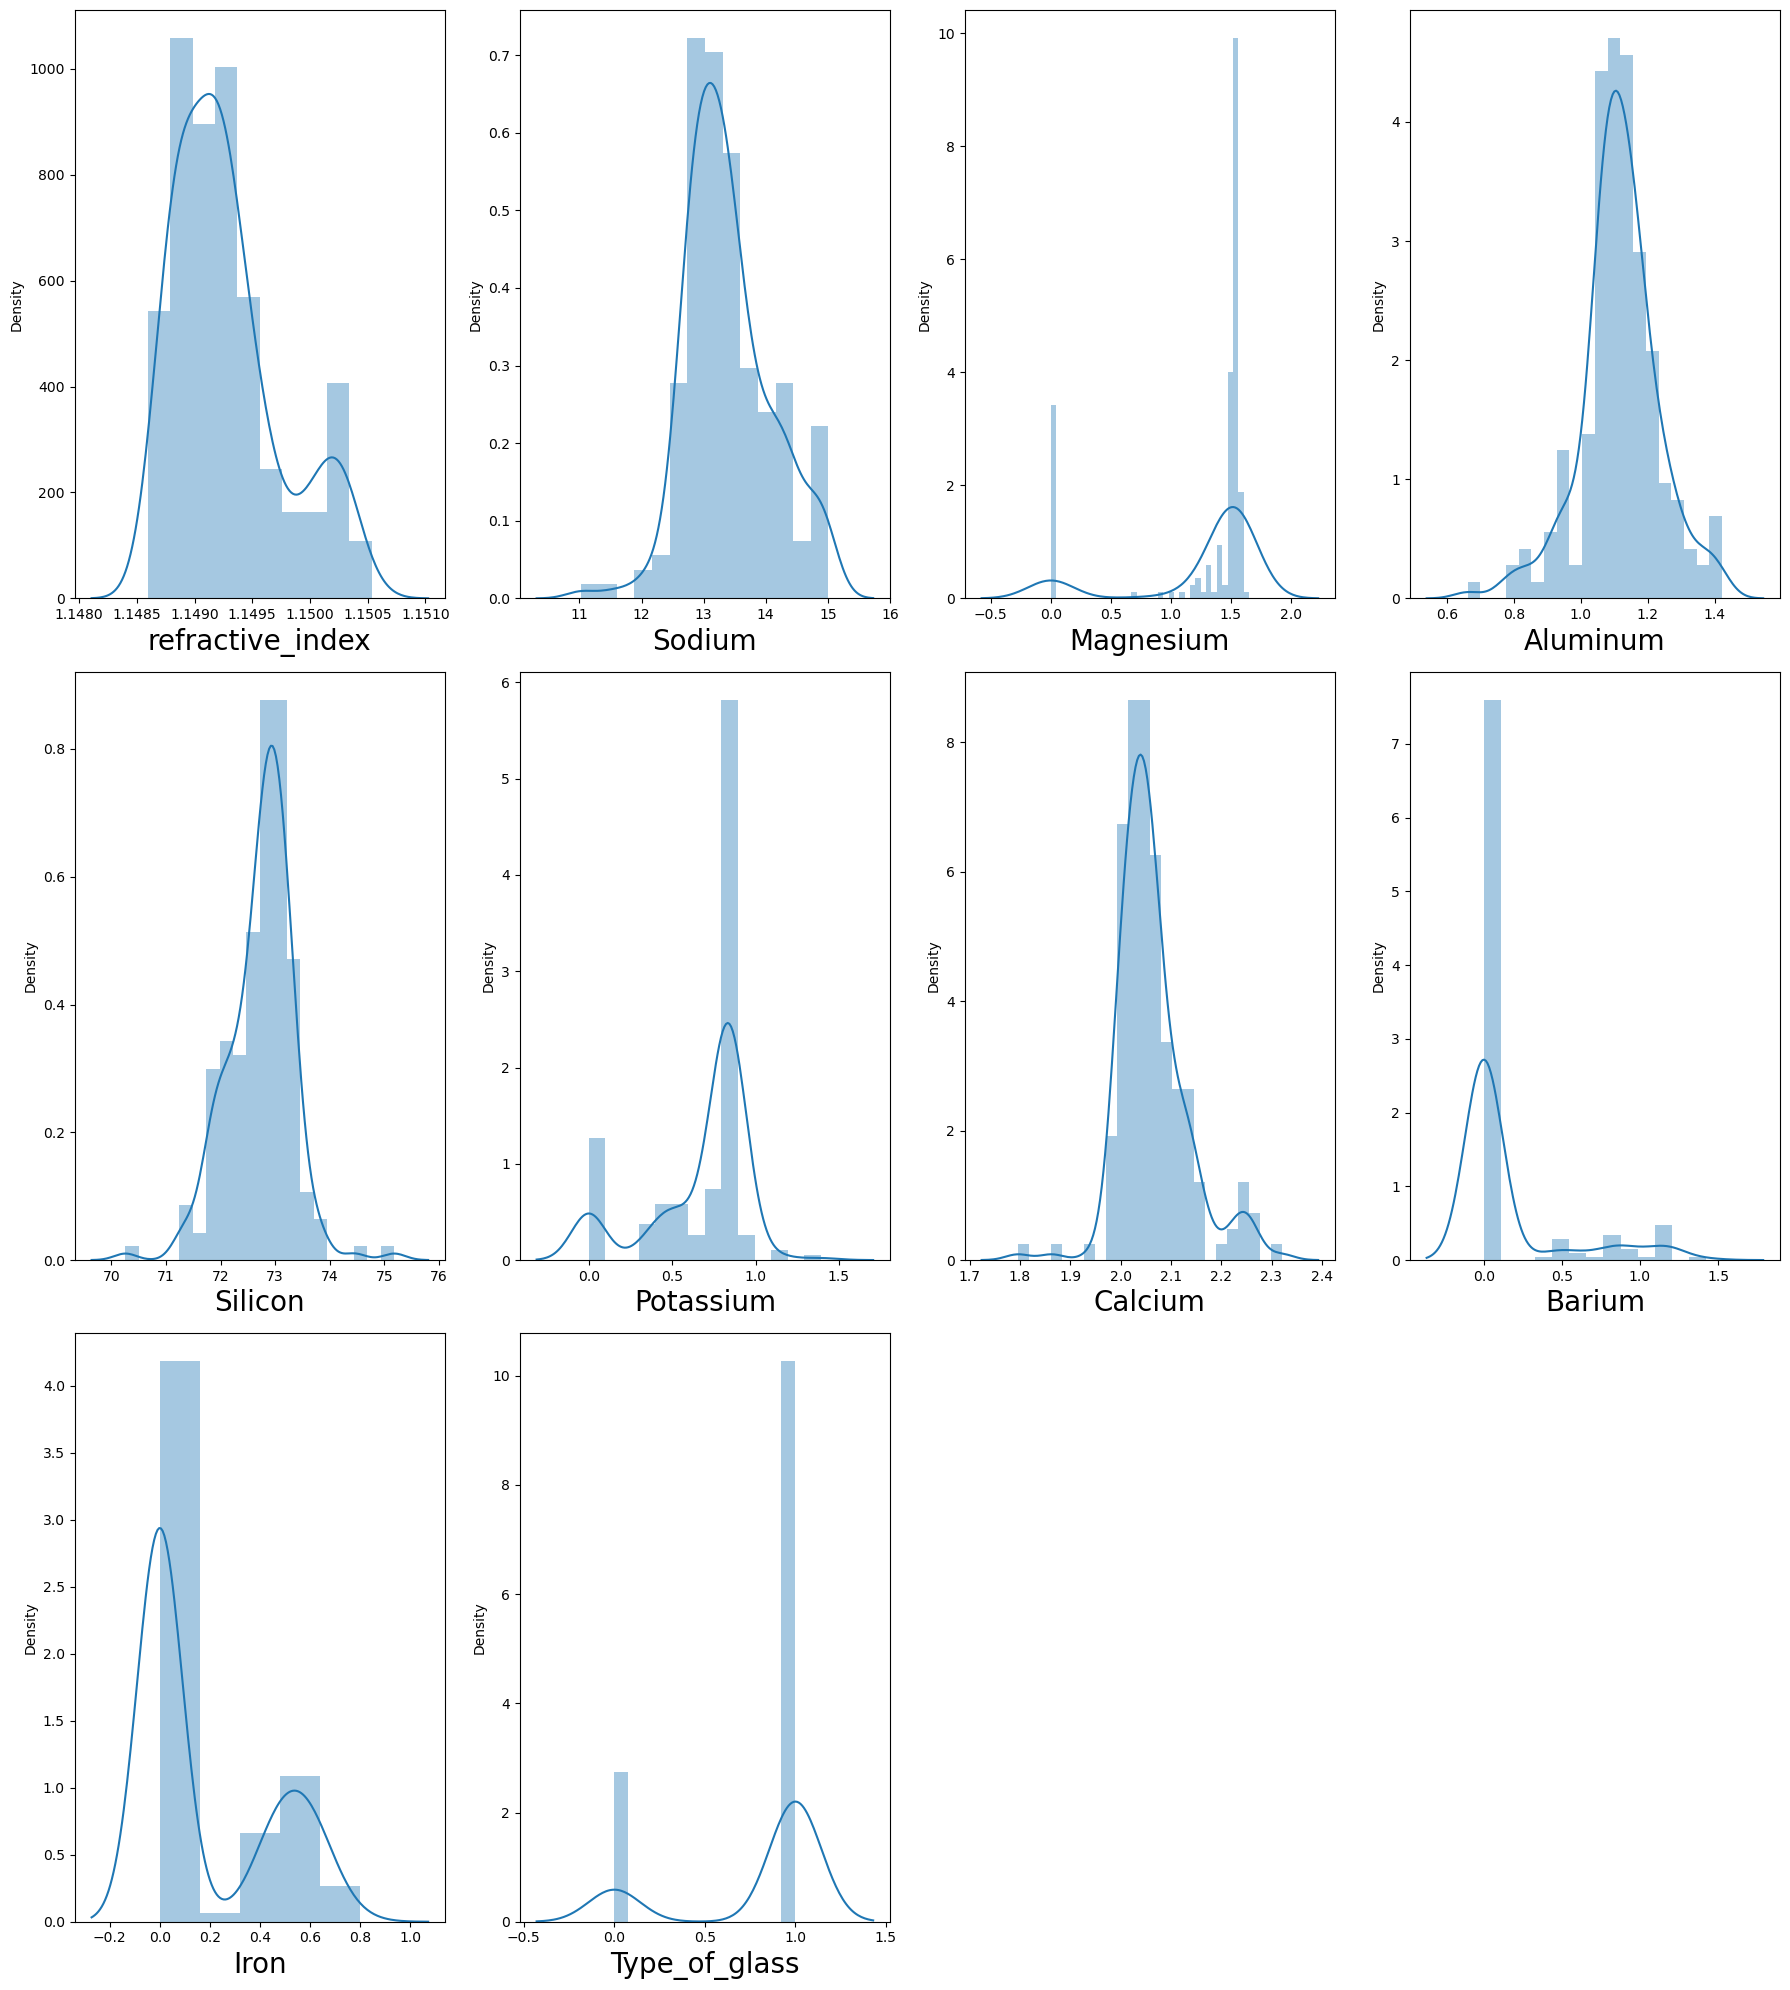

In [22]:
plt.figure(figsize=(18,20),facecolor="w")
plot=1
for i in data:
    if plot<=11:
        ax=plt.subplot(3,4,plot)
        sns.distplot(data[i])
        plt.xlabel(i,fontsize=20)
    plot+=1
plt.tight_layout()

In [23]:
x=data.drop(columns='Type_of_glass')
y=data['Type_of_glass']

In [24]:
x.shape

(190, 9)

In [25]:
y.shape


(190,)

In [26]:
from sklearn.preprocessing import StandardScaler
sclaer=StandardScaler()

In [27]:
x=pd.DataFrame(sclaer.fit_transform(x),columns=x.columns)

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [29]:
x.head()

,refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron
0,1.619411,0.355419,0.708165,-0.716870,-1.617667,-0.951124,-0.030068,-0.425026,-0.685923
1,-0.232860,0.721314,0.494080,-0.066846,-0.004469,0.367084,-1.127658,-0.425026,-0.685923
2,-1.012730,0.194425,0.481050,0.335866,0.437038,0.190781,-1.189720,-0.425026,-0.685923
3,-0.205601,-0.273921,0.517234,-0.233060,-0.208241,0.522517,-0.652407,-0.425026,-0.685923
4,-0.336451,-0.186106,0.499258,-0.355502,0.589867,0.489474,-0.833379,-0.425026,-0.685923


In [30]:
vif=pd.DataFrame()
vif['vif_val']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features']=x.columns
vif

,vif_val,Features
0,4.626201,refractive_index
1,8.886059,Sodium
2,12.329521,Magnesium
3,2.953295,Aluminum
4,6.943456,Silicon
5,4.326008,Potassium
6,6.348847,Calcium
7,4.248331,Barium
8,1.074048,Iron


In [32]:
data.drop(columns='Magnesium',inplace=True)

In [33]:
data.head()

,refractive_index,Sodium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type_of_glass
0,1.150034,13.64,1.032280,71.78,0.391487,2.060643,0.0,0.0,1
1,1.149176,13.89,1.107932,72.73,0.782974,1.985732,0.0,0.0,1
2,1.148815,13.53,1.154800,72.99,0.730614,1.981496,0.0,0.0,1
3,1.149189,13.21,1.088587,72.61,0.829134,2.018168,0.0,0.0,1
4,1.149129,13.27,1.074337,73.08,0.819321,2.005816,0.0,0.0,1


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=78)

In [36]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [37]:
lr.fit(x_train,y_train)

LogisticRegression()

In [38]:
y_pred=lr.predict(x_test)

In [39]:
from sklearn.metrics import accuracy_score

In [44]:
print(accuracy_score(y_test,y_pred)*100,'%')

93.75 %
